In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import katdal

## MeerKAT antennas

In [3]:
filename = 'data/1557528200_sdp_l0.rdb'
observation = katdal.open(filename)
antenna = observation.ants[0]

In [4]:
print antenna

m000: 13-m dish at ENU offset [  -8.264  -207.29      8.5965] m from lat -30:42:39.8, long 21:26:38.0, alt 1086.6 m


Each antenna is a katpoint.Antenna object.
Printing the antenna information will results in a string containing the following information:    
`<name>`: `<dia>`-m dish at ENU offset [ `<enu>` ] m from lat `<lat DD:MM:SS.f>`, long `<lon DD:MM:SS.f>`, alt `<elev>` m

Parameter | Type | Description
---- | -------- | -------------------
`name` | [string] | Name of the antenna
`dia` | [float] | Dish diameter in meters    
`enu` | [tuple of floats] | East-North-Up offset from WGS84 reference position, in metres. The (lat, lon, alt) of each dish is converted to an (East, North, Up) offset relative to the reference position and each offset rounded to the nearest millimetre.
`lat` | [string or float] | Geodetic latitude of reference position, either in 'D:M:S' string format or float in radians
`lon` | [string or float] | Longitude of reference position, either in 'D:M:S' string format or a float in radians
`elev` | [float] | Altitude above WGS84 geoid, in metres

In [5]:
print '{}: {}-m dish at ENU offset {} m from lat {}, long {}, alt {:.1f} m'.format(
    antenna.name,
    antenna.diameter,
    antenna.position_enu,
    antenna.ref_observer.lat,
    antenna.ref_observer.lon,
    antenna.ref_observer.elevation,
    )

m000: 13.5-m dish at ENU offset (-8.264, -207.29, 8.5965) m from lat -30:42:39.8, long 21:26:38.0, alt 1086.6 m


## MeerKAT antenna descriptions

The information provided by quering the antenna directly is only a subset of the information that is available per antennas.
To display the full antenna information set, print `antenna.description`

In [6]:
print antenna.description

m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -8.264 -207.29 8.5965 212.596 212.743 1.0, 0:03:31.3 0 -0:00:12.2 0:01:07.1 0:00:14.6 -0:00:13.3 0:13:23.6 0:01:27.9, 1.22


Each antenna is a katpoint.Antenna object.
Printing the antenna information will results in a string containing the following information:    
`<name>`, `<ref lat>`, `<ref lon>`, `<ref elev>`, `<dia>`, `<delay: E N U H V 1.0>`, `<pointing P1 P2=0 P3 P4 P5 P6 P7 P8>`, `<beamwidth>`

Parameter | Type | Description
---- | -------- | -------------------
`name` | [string] | Name of the antenna
`ref lat` | [string or float] | Geodetic latitude of reference position, either in 'D:M:S' string format or float in radians
`ref lon` | [string or float] | Longitude of reference position, either in 'D:M:S' string format or a float in radians
`ref elev` | [float] | Altitude above WGS84 geoid, in metres
`dia` | [float] | Dish diameter in meters    
`delay` | [`DelayModel` object] | Delay model for antenna, either as a direct object, a file-like object representing a parameter file, or a string or sequence of float params.
 |The first three parameters form an East-North-Up offset from WGS84 reference position, in metres:  
 | `E` | antenna position: offset East of reference position
 | `N` | antenna position: offset North of reference position
 | `U` | antenna position: offset above reference position
 |The second three set gives the path length correction factors, in metres: 
 | `H` | fixed additional path length for H feed due to electronics / cables
 | `V` | fixed additional path length for V feed due to electronics / cables
 | `NIAO` | non-intersecting axis offset - distance between az and el axes
`pointing` | [`PointingModel` object] | Pointing model for antenna, either as a direct object, a file-like object representing a parameter file, or a string or sequence of float parameters, in degrees:
 |PointingModel has 22 parameters with 7 active (non-default):
 | `P1` | az offset = encoder bias - tilt around [tpoint -IA]
 | `P3` | left-right axis skew = non-perpendicularity of az/el axes [tpoint -NPAE]
 | `P4` | az box offset / collimation error = RF-axis misalignment [tpoint CA]
 | `P5` | tilt out = az ring tilted towards north [tpoint AN]
 | `P6` | tilt over = az ring tilted towards east [tpoint -AW]
 | `P7` | el offset = encoder bias - forward axis skew - el box offset [tpoint IE]
 | `P8` | gravity sag / Hooke law flexure / el centering error [tpoint ECEC/-TF]
`beamwidth` | [float] | Full width at half maximum (FWHM) average beamwidth, as a multiple of $\lambda$ / D (wavelength / dish diameter). This depends on the dish illumination pattern, and ranges from 1.03 for a uniformly illuminated circular dish to 1.22 for a Gaussian-tapered circular dish (the default).


In [7]:
print '{}, {}, {}, {:.1f}, {}, {}, {}, {}'.format(
    antenna.name,
    antenna.ref_observer.lat,
    antenna.ref_observer.lon,
    antenna.ref_observer.elev,
    antenna.diameter,
    ' '.join([str(val) for val in antenna.delay_model.values()]),
    ' '.join([str(val) for val in antenna.pointing_model.values()[:8]]),
    antenna.beamwidth,
    )

m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5, -8.264 -207.29 8.5965 212.596 212.743 1.0, 0:03:31.3 0:00:00.0 -0:00:12.2 0:01:07.1 0:00:14.6 -0:00:13.3 0:13:23.6 0:01:27.9, 1.22


In [8]:
print antenna.delay_model

DelayModel has 6 parameters with 6 active (non-default):
POS_E = -8.264  m (antenna position: offset East of reference position)
POS_N = -207.29 m (antenna position: offset North of reference position)
POS_U = 8.5965  m (antenna position: offset above reference position)
FIX_H = 212.596 m (fixed additional path length for H feed due to electronics / cables)
FIX_V = 212.743 m (fixed additional path length for V feed due to electronics / cables)
NIAO  = 1.0     m (non-intersecting axis offset - distance between az and el axes)


In [9]:
print antenna.pointing_model

PointingModel has 22 parameters with 7 active (non-default):
P1  = 0:03:31.3  deg (az offset = encoder bias - tilt around [tpoint -IA])
P3  = -0:00:12.2 deg (left-right axis skew = non-perpendicularity of az/el axes [tpoint -NPAE])
P4  = 0:01:07.1  deg (az box offset / collimation error = RF-axis misalignment [tpoint CA])
P5  = 0:00:14.6  deg (tilt out = az ring tilted towards north [tpoint AN])
P6  = -0:00:13.3 deg (tilt over = az ring tilted towards east [tpoint -AW])
P7  = 0:13:23.6  deg (el offset = encoder bias - forward axis skew - el box offset [tpoint IE])
P8  = 0:01:27.9  deg (gravity sag / Hooke law flexure / el centering error [tpoint ECEC/-TF])


In [10]:
print antenna.ref_observer
print antenna.observer

<ephem.Observer date='2019/5/30 04:17:57' epoch='2000/1/1 12:00:00' lon='21:26:38.0' lat='-30:42:39.8' elevation=1086.6m horizon=0:00:00.0 temp=15.0C pressure=0.0mBar>
<ephem.Observer date='2019/5/30 04:17:57' epoch='2000/1/1 12:00:00' lon='21:26:37.7' lat='-30:42:46.5' elevation=1095.19988706m horizon=0:00:00.0 temp=15.0C pressure=0.0mBar>


## Antenna position from reference position

In [11]:
from astropy import units as u
from astropy.coordinates import Longitude, Latitude, EarthLocation

In [12]:
# Telescope reference position
ref_lon = str(antenna.ref_observer.lon)
ref_lon = Longitude(ref_lon.strip(), u.degree, wrap_angle=180*u.degree, copy=False)
ref_lat = str(antenna.ref_observer.lat)
ref_lat = Latitude(ref_lat.strip(), u.degree, copy=False)
ref_alt = str(antenna.ref_observer.elev)
ref_alt = u.Quantity(float(ref_alt.strip()), u.m, copy=False)
ref_location = EarthLocation(lat=ref_lat.to(u.deg).value,
                             lon=ref_lon.to(u.deg).value,
                             height=ref_alt.to(u.m).value)
[x, y, z] = ref_location.to_geocentric()

In [13]:
# Antenna position relative to reference
[delta_North, delta_East, delta_Up] = antenna.position_enu
ant_location = EarthLocation((x.value+float(delta_North))*u.m,
                             (y.value+float(delta_East))*u.m,
                             (z.value+float(delta_Up))*u.m)
print ant_location.lat, ant_location.lon, ant_location.height

-30d42m40.9441s 21d26m30.8636s 1010.44462073 m


## Show array layout

In [14]:
from mpl_toolkits.basemap import Basemap

In [15]:
# Get array
arr_latitude = []
arr_longitude = []
arr_names = []
for antenna in observation.ants:
    # Antenna position relative to reference
    [delta_North, delta_East, delta_Up] = antenna.position_enu
    ant_location = EarthLocation((x.value+float(delta_North))*u.m,
                                 (y.value+float(delta_East))*u.m,
                                 (z.value+float(delta_Up))*u.m)

    
    arr_names.append(antenna.name)
    arr_latitude.append(ant_location.lat.value)
    arr_longitude.append(ant_location.lon.value)

In [16]:
# Earth projection
m = Basemap(projection='merc',
            lat_0=ref_location.lat.value,
            lon_0=ref_location.lon.value,
            llcrnrlon=np.min(arr_longitude)-0.005,
            llcrnrlat=np.min(arr_latitude)-0.005,
            urcrnrlon=np.max(arr_longitude)+0.005,
            urcrnrlat=np.max(arr_latitude)+0.005)
# set regular grid and map projected coordinates
ref_x, ref_y = m(ref_location.lon.value, ref_location.lat.value)
arr_x, arr_y = m(arr_longitude, arr_latitude)    

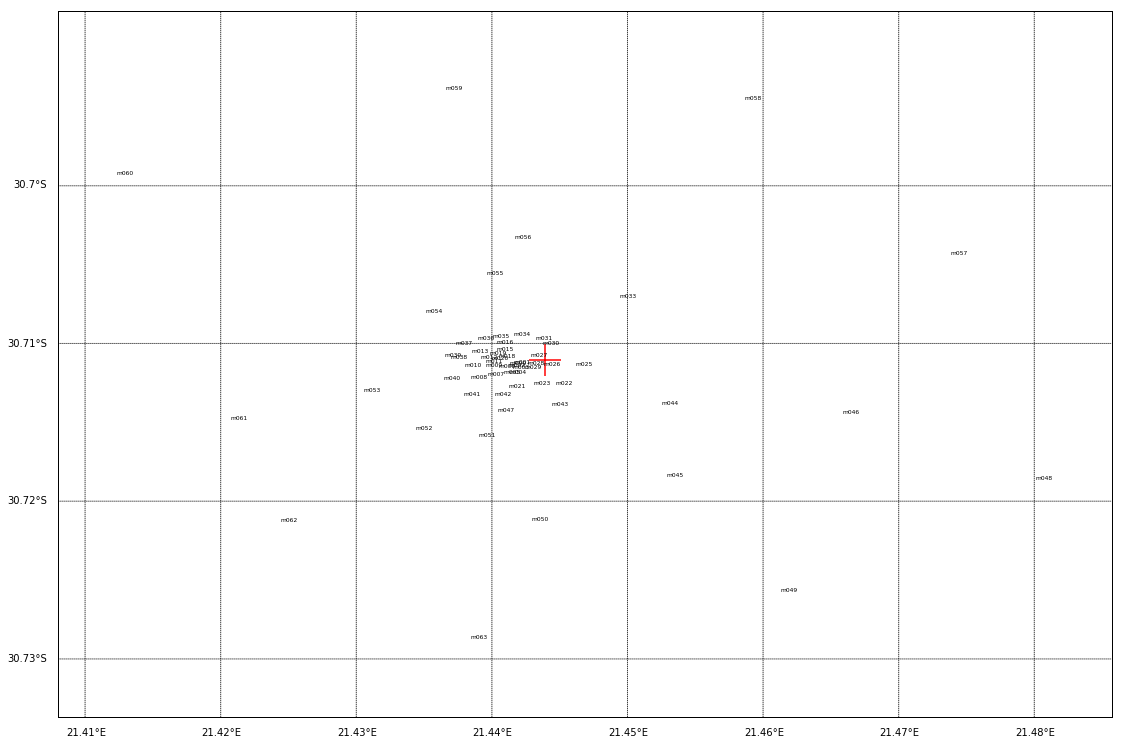

In [18]:
# Array layout
plt.figure(figsize=(20, 13), facecolor='white');
# draw parallels.
parallels = np.arange(-30.73, -30.69, .01)
m.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10);
# draw meridians
meridians = np.arange(21.41, 21.48, .01)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10);
m.drawmapboundary(fill_color='white');  # noqa
m.scatter(ref_x, ref_y, 1000, marker='+', color='r', label='Array reference');
cntr = 0
for x, y in zip(arr_x, arr_y):
    plt.text(x, y, arr_names[cntr], fontsize=6, ha='center', va='baseline', color='k');
    cntr += 1